Under the hood any data that you can represent in a graph, you can also represent as a matrix of values. Therefore, `networkx` has a ton of great tools for translating between graph thinking and your typical Data Science `numpy/pandas` fare.

## Simple Data

To demonstrate this, we'll load the canonical dataset representing a group of kids in a karate cohort and measuring if they interacted outside of class at all.

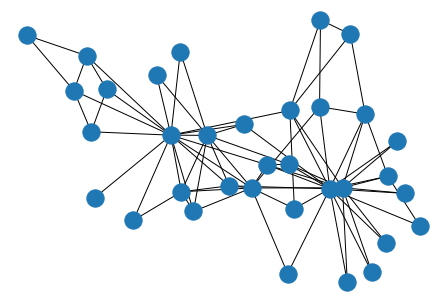

In [1]:
import networkx as nx

G = nx.karate_club_graph()

# ensure the same position
layout = nx.spring_layout(G)
nx.draw(G, pos=layout)

As you can see, there are 34 students, and the 78 edges between them represent relationships that emerged between each pair, outside the context of the course.

In [2]:
display(G.number_of_edges())
display(G.number_of_nodes())

78

34

## Numpy

As I said above, all graph data can be boiled down to tabular data. In this case, we can represent this network as an *adjacency matrix*, where we have `n` rows and `n` columns (where `n` is the number of nodes in our network). And is read by looking at the intersection of row `m` and column `n`-- if the value is `1`, there's an edge in the network, otherwise it's zero.

### To Matrix 

Getting to this point is a one-liner in `networkx`

In [3]:
mat = nx.to_numpy_matrix(G)
print(mat)

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


As promised, the shape of the matrix is `n x n`

In [4]:
mat.shape

(34, 34)

And if you inspect the number of `1`s in the matrix, you might be surprised to see that it's double what you had expected.

In [5]:
mat.sum()

156.0

But if you actually plot out the matrix, it should be clear that the data is symmetric down the middle.

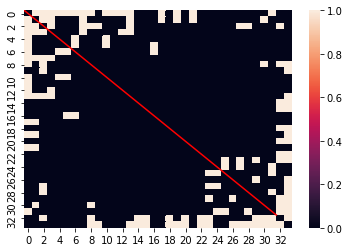

In [6]:
import numpy as np
import seaborn as sns

ax = sns.heatmap(mat)
ax.plot(np.linspace(32, 0), np.linspace(32, 0), 'r');

This is because `n=m` has a value of `1` at the point `(n, m)` AS WELL AS `(m, n)`. Therefore, we get the value we might have expected to see by dividing by 2.

In [7]:
mat.sum() / 2

78.0

### From Matrix

Similarly, we can work backwards from an adjacency matrix to a graph with another one-liner.

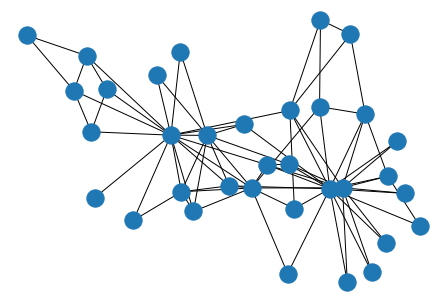

In [8]:
nx.draw(nx.from_numpy_matrix(mat), pos=layout)

## Pandas

In general, `pandas` does a lot of the same work that `numpy` does, but with greater context, and less emphasis on raw, numeric compute.

### To Adjacency 

Adjacency matrix and `networkx` is no different. Here, we get the same underlying values that we did when we piped our data into a `numpy` format, but with the added context of our node labels as row and column indicies.

In [9]:
df = nx.to_pandas_adjacency(G)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### From Adjacency

Same as before, we can construct new graph objects from an adjacency DataFrame, no problem.

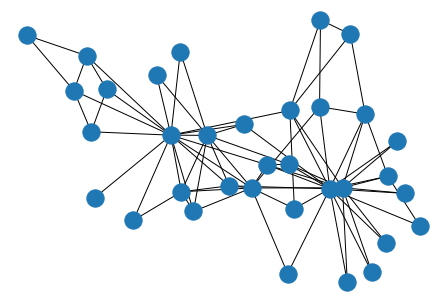

In [10]:
nx.draw(nx.from_pandas_adjacency(df), pos=layout)

### To Edgelist

One interesting wrinkle to this, however, comes when we decide to transform our network data into a tall, *sparse* DataFrame representation.

Here, we can build a DataFrame that represents all `(from, to)` edge pairs in our data, and omits the rest.

In [11]:
nx.to_pandas_edgelist(G)

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
73,30,32
74,30,33
75,31,32
76,31,33


### From Edgelist

And in reverse, if we have a DataFrame organized in a similar fashion

In [12]:
import pandas as pd

connected_pairs = []

for col in df.columns:
    for row, val in enumerate(df[col]):
        if val == 1:
            connected_pairs.append((row, col))

pair_df = pd.DataFrame(connected_pairs, columns=['from', 'to'])
pair_df.head()

,from,to
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


We can specify which columns represent the `source` and `target` node labels, with which to draw the new edges.

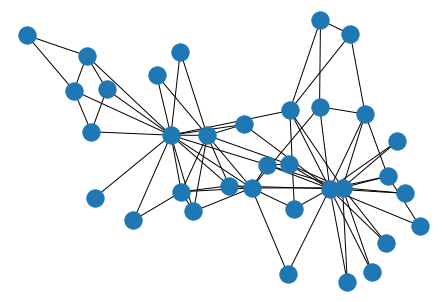

In [13]:
F = nx.from_pandas_edgelist(pair_df, source='from', target='to')
nx.draw(F, pos=layout)

Giving us the same Graph representation that we started with.